In [8]:
!pip uninstall -y geopandas numpy matplotlib pandas

Found existing installation: geopandas 1.0.1
Uninstalling geopandas-1.0.1:
  Successfully uninstalled geopandas-1.0.1
Found existing installation: numpy 1.26.4
Uninstalling numpy-1.26.4:
  Successfully uninstalled numpy-1.26.4
Found existing installation: matplotlib 3.9.2
Uninstalling matplotlib-3.9.2:
  Successfully uninstalled matplotlib-3.9.2
Found existing installation: pandas 2.2.3
Uninstalling pandas-2.2.3:
  Successfully uninstalled pandas-2.2.3


In [9]:
!pip install geopandas numpy==1.26.4 matplotlib pandas

  Using cached geopandas-1.0.1-py3-none-any.whl.metadata (2.2 kB)
  Using cached numpy-1.26.4-cp312-cp312-macosx_11_0_arm64.whl.metadata (61 kB)
  Using cached pandas-2.2.3-cp312-cp312-macosx_11_0_arm64.whl.metadata (89 kB)
Using cached numpy-1.26.4-cp312-cp312-macosx_11_0_arm64.whl (13.7 MB)
Using cached geopandas-1.0.1-py3-none-any.whl (323 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 3.6 MB/s eta 0:00:00a 0:00:01
Using cached pandas-2.2.3-cp312-cp312-macosx_11_0_arm64.whl (11.4 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
blis 1.0.2 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
thinc 8.3.2 requires numpy<2.1.0,>=2.0.0; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.


In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import os

# Load the Polars DataFrame from the Parquet file
DATA_FOLDER = os.path.join(os.getcwd(), '../data/processed/')
parquet_file = DATA_FOLDER + 'top_words_per_country.pq'

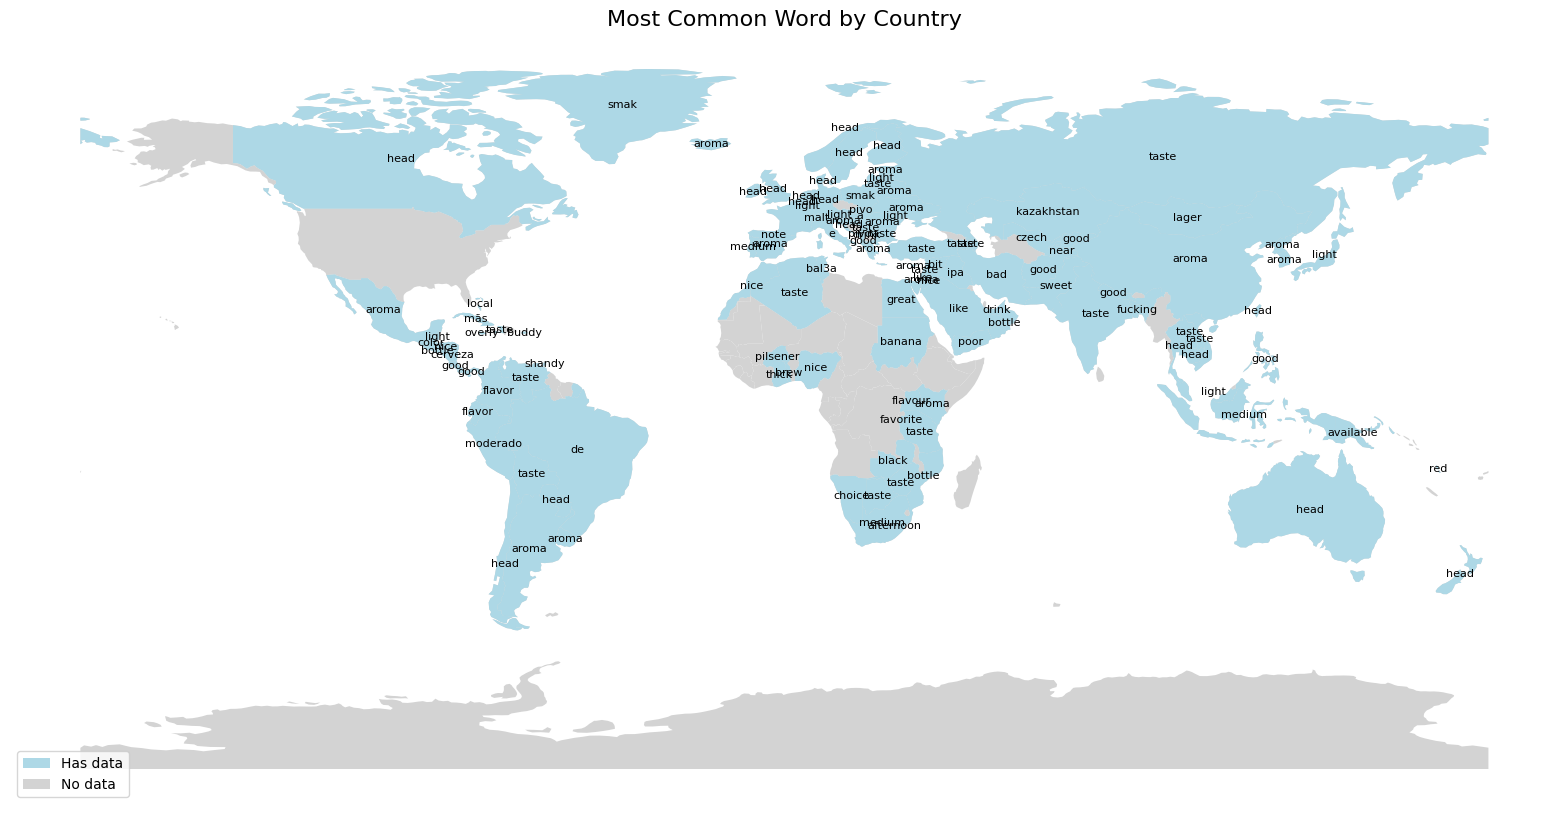

In [2]:
top_words_df = pd.read_parquet(parquet_file)

# Rename columns to match GeoPandas world map's structure
top_words_df = top_words_df.rename(columns={
    "country_user": "country",  # Match 'country' column in GeoPandas
    "top_word": "word"  # Match 'word' column in the map function
})

# Load world map data directly from GitHub
world = gpd.read_file(
    "https://raw.githubusercontent.com/nvkelso/natural-earth-vector/master/geojson/ne_110m_admin_0_countries.geojson"
)

# Merge the word data with the map data
world = world.merge(top_words_df, how='left', left_on='NAME', right_on='country')

# Create the plot
fig, ax = plt.subplots(figsize=(20, 10))

# Plot the base map
world.plot(ax=ax, color='lightgray')

# Highlight countries with data
world[~world['word'].isna()].plot(ax=ax, color='lightblue')

# Add word labels to the countries
for idx, row in world[~world['word'].isna()].iterrows():
    centroid = row.geometry.centroid
    ax.annotate(
        row['word'],
        xy=(centroid.x, centroid.y),
        xytext=(0, 0),
        textcoords="offset points",
        ha='center',
        va='center',
        fontsize=8
    )

# Customize the map
ax.set_title('Most Common Word by Country', fontsize=16)
ax.axis('off')

# Add a legend for countries with/without data
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='lightblue', label='Has data'),
    Patch(facecolor='lightgray', label='No data')
]
ax.legend(handles=legend_elements, loc='lower left')

# Display the map
plt.show()


In [3]:

# Identify invalid countries (those in `top_words_df` not in `world['NAME']`)
invalid_countries = set(top_words_df['country']) - set(world['NAME'])
if invalid_countries:
    print(f"Invalid countries: {invalid_countries}")

Invalid countries: {'Montserrat', 'Nagorno-Karabakh', 'San Marino', 'Andorra', 'Monaco', 'Fiji Islands', 'Abkhazia', 'American Samoa', 'Micronesia', None, 'Guam', 'Singapore', 'Saint Vincent and The Grenadines', 'Norfolk Island', 'Macau', 'Saint Lucia', 'Malta', 'Hong Kong', 'Antigua and Barbuda', 'Falkland Islands', 'Ivory Coast', 'Cayman Islands', 'Czech Republic', 'Vatican City', 'Hawaii', 'Liechtenstein', 'Tibet', 'Sint Maarten', 'Dominican Republic', 'East Timor', 'Ascension Island', 'Isle of Man', 'United States', 'Bosnia and Herzegovina', 'Tuvalu', 'French Guiana', 'Bermuda', 'Jersey', 'Macedonia', 'Faroe Islands', 'Virgin Islands (U.S.)', 'Virgin Islands (British)', 'Barbados', 'Marshall Islands', 'Dem Rep of Congo', 'Mauritius', 'Slovak Republic', 'Saint Helena'}


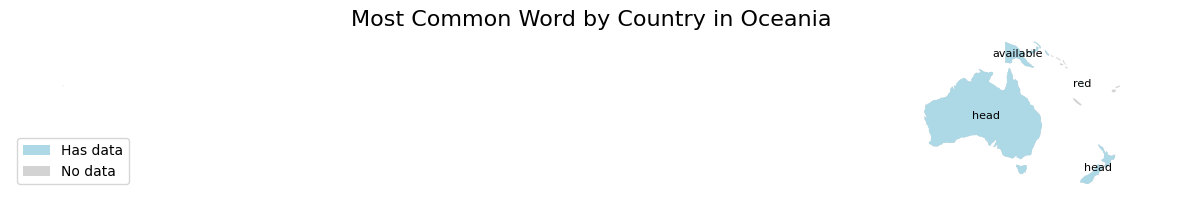

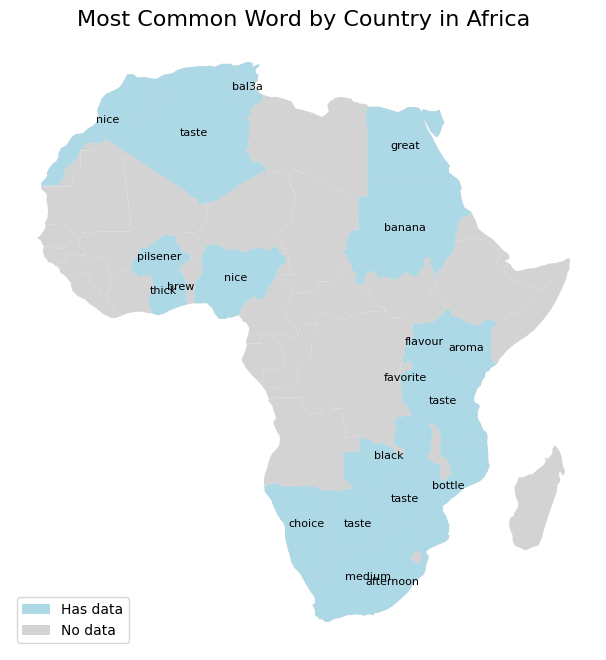

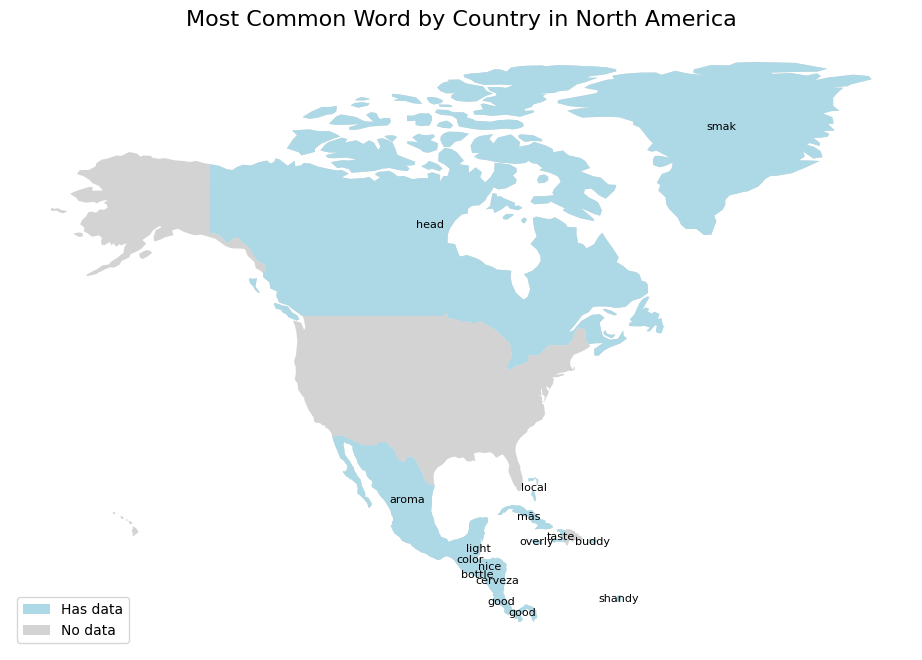

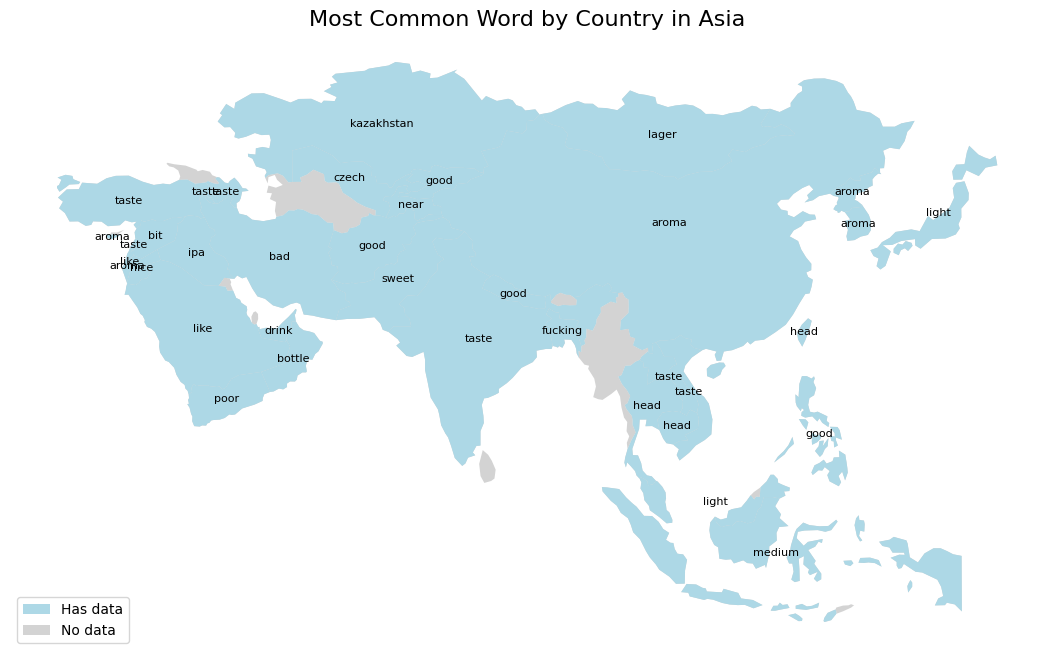

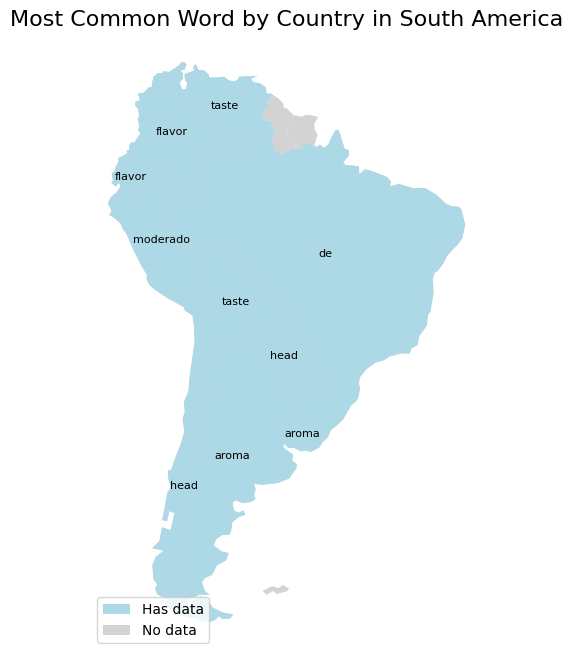

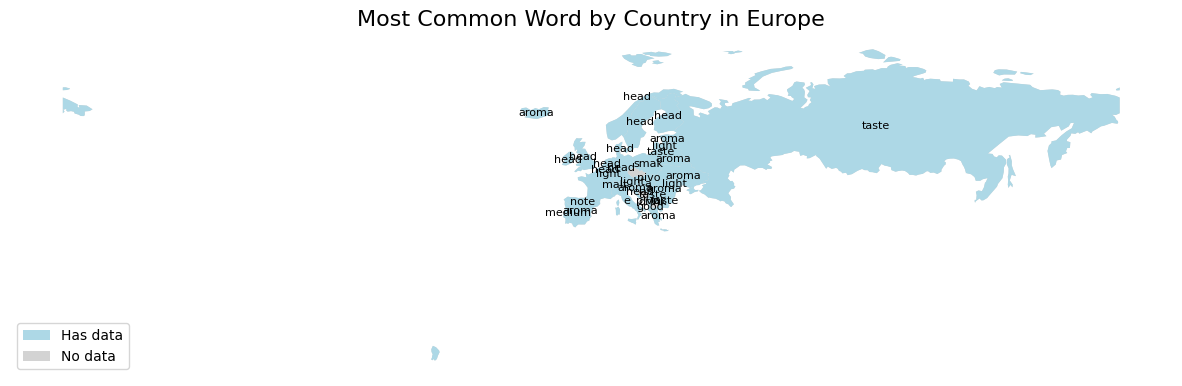

ValueError: aspect must be finite and positive 

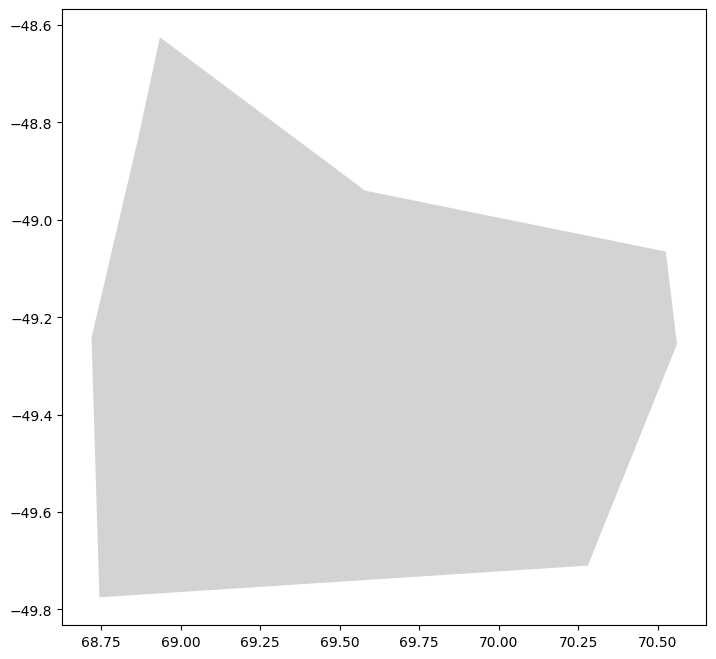

In [4]:

# List of continents to iterate through
continents = world['CONTINENT'].unique()

# Generate a separate map for each continent
for continent in continents:
    # Filter the world map by continent
    continent_map = world[world['CONTINENT'] == continent]

    # Create the plot
    fig, ax = plt.subplots(figsize=(15, 8))

    # Plot the base map
    continent_map.plot(ax=ax, color='lightgray')

    # Highlight countries with valid data
    continent_map[~continent_map['word'].isna()].plot(ax=ax, color='lightblue')

    # Add word labels to the countries with valid data
    for idx, row in continent_map[~continent_map['word'].isna()].iterrows():
        centroid = row.geometry.centroid
        ax.annotate(
            row['word'],
            xy=(centroid.x, centroid.y),
            xytext=(0, 0),
            textcoords="offset points",
            ha='center',
            va='center',
            fontsize=8
        )

    # Customize the map
    ax.set_title(f'Most Common Word by Country in {continent}', fontsize=16)
    ax.axis('off')

    # Add a legend for countries with/without data
    from matplotlib.patches import Patch
    legend_elements = [
        Patch(facecolor='lightblue', label='Has data'),
        Patch(facecolor='lightgray', label='No data')
    ]
    ax.legend(handles=legend_elements, loc='lower left')

    # Show the plot
    plt.show()